Лабораторна 2

# Завдання
6) Завантажте дані за посиланням https://archive.ics.uci.edu/ml/datasets/banknote+authentication
7) Реалізувати модель логістичної регресії з наступними функціями втрат:
а) Logistic loss
б) Adaboost loss
в) binary crossentropy
8) Візуалізувати криві навчання моделі бінарної класифікації у вигляді динаміки зміни кожної з функцій помилок п.2 на тренувальній та тестовій вибірках.
9) Порівняти якість класифікації за метрикою accuracy у кожному з трьох модифікацій алгоритму

Моделі

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Допоміжні функції

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score

Зчитування даних

In [4]:
data = pd.read_csv('source/data_banknote_authentication.txt',
                   header = None,
                   names = ['variance', 'skewness', 'curtosis', 'entropy', 'target']
                   )
data

Розбиття на тестову та тренувальну вибірки

In [6]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Logistic Regression

Accuracy: 0.9963636363636363


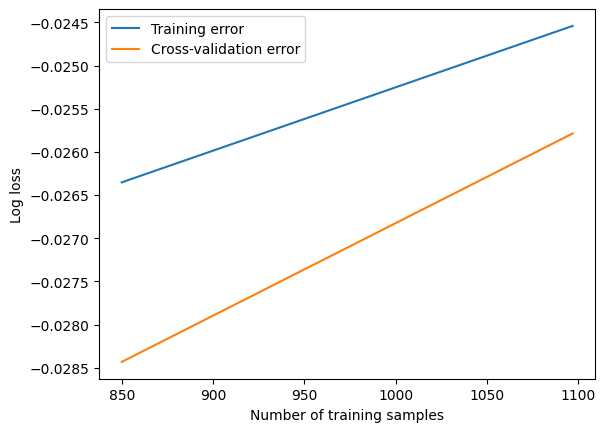

In [14]:
log_reg = LogisticRegression(solver='lbfgs')

train_sizes, train_scores, test_scores = learning_curve(log_reg, X, y, scoring='neg_log_loss')

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Cross-validation error')
plt.xlabel('Number of training samples')
plt.ylabel('Log loss')
plt.legend()
plt.show()

Adaptive boosting

Accuracy: 1.0


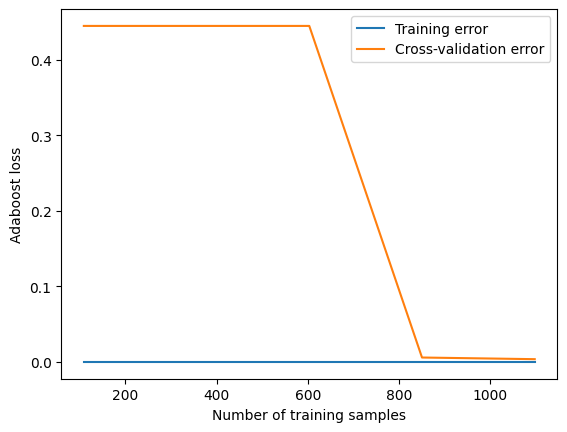

In [ ]:
ada_boost = AdaBoostClassifier()

train_sizes, train_scores, test_scores = learning_curve(ada_boost, X, y, )

train_mean = 1 - train_scores.mean(axis=1)
test_mean = 1 - test_scores.mean(axis=1)

ada_boost.fit(X_train, y_train)

y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Cross-validation error')
plt.xlabel('Number of training samples')
plt.ylabel('Adaboost loss')
plt.legend()
plt.show()

binary crossentropy

9/9 [==============================] - 0s 873us/step
Accuracy: 0.9927272727272727


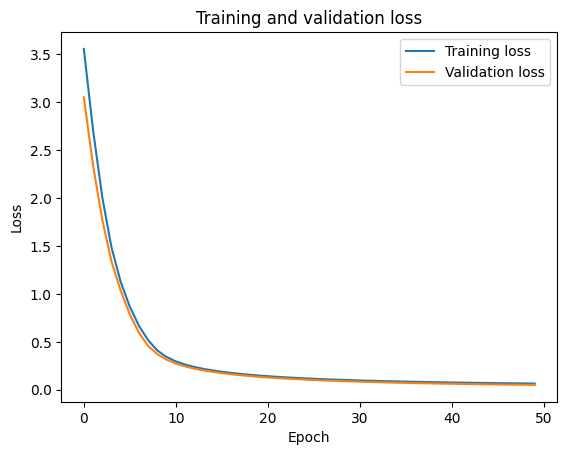

In [22]:
model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.005))

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()